In [1]:
from helpers import *
import pandas as pd

In [2]:
#2.2
simulator1 = queuSim(capacity=1, numSim=5)
simulator2 = queuSim(capacity=2, numSim=5)
simulator4 = queuSim(capacity=4, numSim=5)

In [3]:
waitTimes1 = simulator1.runSim()
waitTimes2 = simulator2.runSim()
waitTimes4 = simulator4.runSim()

In [ ]:
# we can reject the null hypothesis
st.f_oneway(waitTimes1, waitTimes2, waitTimes4)

In [ ]:
# post hoc tests prove that there are differences between all populations
print(st.ttest_ind(waitTimes1, waitTimes4))
print(st.ttest_ind(waitTimes1, waitTimes2))
print(st.ttest_ind(waitTimes2, waitTimes4))

In [4]:
# 2.2, run multiple simulations for different p
# service time is fixed at 2 
# customer intervals gets scaled for the amount of servers
# p = 2/intervalcustomers
p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
intervalCustomers = 2/p
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=50, newCustomers = 5000, intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=50, newCustomers = 5000, intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=50, newCustomers = 5000, intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

In [5]:
dfAll = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

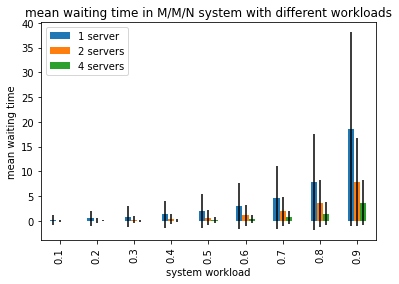

In [6]:
ax = dfAll.plot.bar(title = "mean waiting time in M/M/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [ ]:
# assignment 2.3, use a different service strategy. Shortest job first.


In [ ]:
import simpy
import random
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
def source(env, customerNumber, interval, servers, serviceTime, waitTimes, verbose):
    """Source generates customers randomly"""
    for i in range(customerNumber):
        c = customer(env, 'Customer%02d' % i, servers, serviceTime, waitTimes, verbose)
        env.process(c)
        t = random.expovariate(1.0 / interval) # markovian arrival rate
        yield env.timeout(t)


def customer(env, name, servers, serviceTime, waitTimes, verbose):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    if verbose:
        print('%7.4f %s: Here I am' % (arrive, name))

    with servers.request() as req:
        # Wait for the counter 
        yield req

        wait = env.now - arrive
        waitTimes.append(wait)
        # We got to the counter
        if verbose:
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))

        tib = random.expovariate(1.0 / serviceTime) # markovian service rate
        yield env.timeout(tib)
        if verbose:
            print('%7.4f %s: Finished' % (env.now, name))



In [ ]:
def runSim(num_sim, capacity, waitTimes, verbose=False):
    for i in range(NUM_SIM):
        env = simpy.Environment()
        servers = simpy.Resource(env, capacity)
        # we scale the arrival rate with the number of servers, so system load is stable
        env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS/capacity, servers, SERVICE_TIME, waitTimes, verbose))
        env.run()

In [ ]:
RANDOM_SEED = 42
NEW_CUSTOMERS = 500 # Total number of customers per run
INTERVAL_CUSTOMERS = 2  # Generate new customers roughly every x seconds, 1/lambda
SERVICE_TIME = 2 # time spend at a server, mu
NUM_SIM = 5
random.seed(RANDOM_SEED)

In [ ]:
waitTimes1 = []
runSim(30, 1, waitTimes1)

In [ ]:
waitTimes2 = []
runSim(3, 2, waitTimes2)

In [ ]:
waitTimes4 = []
runSim(3,4, waitTimes4)

In [ ]:
np.mean(waitTimes1)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.set_size_inches(10.5, 10.5)
fig.suptitle(f"waiting time per customer for p of {SERVICE_TIME/INTERVAL_CUSTOMERS}")
fig.supxlabel("Customer number")
fig.supylabel("Waiting time")
ax1.plot(np.sort(waitTimes1))
ax1.set_title("1 server")
ax2.plot(np.sort(waitTimes2))
ax2.set_title("2 servers")
ax3.plot(np.sort(waitTimes4))
ax3.set_title("4 servers")

In [ ]:
np.mean(waitTimes1)

In [ ]:
np.mean(waitTimes2)

In [ ]:
np.mean(waitTimes4)

In [ ]:
st.ttest_ind(waitTimes1, waitTimes2)

In [ ]:
st.ttest_ind(waitTimes1, waitTimes4)

In [ ]:
SERVICE_TIME = 10

waitTimes1 = []
runSim(3, 1, waitTimes1)
waitTimes2 = []
runSim(3, 2, waitTimes2)
waitTimes4 = []
runSim(3, 4, waitTimes4)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.set_size_inches(10.5, 10.5)
fig.suptitle(f"waiting time per customer for p of {SERVICE_TIME/INTERVAL_CUSTOMERS}")
fig.supxlabel("Customer number")
fig.supylabel("Waiting time")
ax1.plot(np.sort(waitTimes1))
ax1.set_title("1 server")
ax2.plot(np.sort(waitTimes2))
ax2.set_title("2 servers")
ax3.plot(np.sort(waitTimes4))
ax3.set_title("4 servers")

In [ ]:
### assignment 2.3
def source(env, customerNumber, interval, servers, serviceTime, waitTimes, verbose):
    """Source generates customers randomly"""
    for i in range(customerNumber):
        c = customer(env, 'Customer%02d' % i, servers, serviceTime, waitTimes, verbose)
        env.process(c)
        t = random.expovariate(1.0 / interval) # markovian arrival rate
        yield env.timeout(t)


def customer(env, name, servers, serviceTime, waitTimes, verbose):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    if verbose:
        print('%7.4f %s: Here I am' % (arrive, name))
        
    # already know the service time beforehand    
    tib = random.expovariate(1.0 / serviceTime) # markovian service rate

    with servers.request(priority = int(1/tib*1000)) as req:
        # Wait for the counter 
        yield req

        wait = env.now - arrive
        waitTimes.append(wait)
        # We got to the counter
        if verbose:
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))

        
        yield env.timeout(tib)
        if verbose:
            print('%7.4f %s: Finished' % (env.now, name))


In [ ]:
def runSim(num_sim, capacity, waitTimes, verbose=False):
    for i in range(NUM_SIM):
        env = simpy.Environment()
        servers = simpy.PriorityResource(env, capacity)
        # we scale the arrival rate with the number of servers, so system load is stable
        env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS/capacity, servers, SERVICE_TIME, waitTimes, verbose))
        env.run()

In [ ]:
SERVICE_TIME = 9

waitTimes1 = []
runSim(3, 1, waitTimes1)
waitTimes2 = []
runSim(3, 2, waitTimes2)
waitTimes4 = []
runSim(3, 4, waitTimes4)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.set_size_inches(10.5, 10.5)
fig.suptitle(f"waiting time per customer for p of {SERVICE_TIME/INTERVAL_CUSTOMERS} with priority for shortest jobs")
fig.supxlabel("Customer number")
fig.supylabel("Waiting time")
ax1.plot(np.sort(waitTimes1))
ax1.set_title("1 server")
ax2.plot(np.sort(waitTimes2))
ax2.set_title("2 servers")
ax3.plot(np.sort(waitTimes4))
ax3.set_title("4 servers")

In [ ]:
####2.4
# M/D
def source(env, customerNumber, interval, servers, serviceTime, waitTimes, verbose):
    """Source generates customers randomly"""
    for i in range(customerNumber):
        c = customer(env, 'Customer%02d' % i, servers, serviceTime, waitTimes, verbose)
        env.process(c)
        t = random.expovariate(1.0 / interval) # markovian arrival rate
        yield env.timeout(t)


def customer(env, name, servers, serviceTime, waitTimes, verbose):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    if verbose:
        print('%7.4f %s: Here I am' % (arrive, name))

    with servers.request() as req:
        # Wait for the counter 
        yield req

        wait = env.now - arrive
        waitTimes.append(wait)
        # We got to the counter
        if verbose:
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))

        tib = 0.5 # deterministic
        yield env.timeout(tib)
        if verbose:
            print('%7.4f %s: Finished' % (env.now, name))



In [ ]:
def runSim(num_sim, capacity, waitTimes, verbose=False):
    for i in range(NUM_SIM):
        env = simpy.Environment()
        servers = simpy.PriorityResource(env, capacity)
        # we scale the arrival rate with the number of servers, so system load is stable
        env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS/capacity, servers, SERVICE_TIME, waitTimes, verbose))
        env.run()

In [ ]:
SERVICE_TIME = 9

waitTimes1 = []
runSim(3, 1, waitTimes1)
waitTimes2 = []
runSim(3, 2, waitTimes2)
waitTimes4 = []
runSim(3, 4, waitTimes4)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.set_size_inches(10.5, 10.5)
fig.suptitle(f"waiting time per customer for p of {SERVICE_TIME/INTERVAL_CUSTOMERS} with deterministic service rate")
fig.supxlabel("Customer number")
fig.supylabel("Waiting time")
ax1.plot(np.sort(waitTimes1))
ax1.set_title("1 server")
ax2.plot(np.sort(waitTimes2))
ax2.set_title("2 servers")
ax3.plot(np.sort(waitTimes4))
ax3.set_title("4 servers")

In [ ]:
def source(env, customerNumber, interval, servers, serviceTime, waitTimes, verbose):
    """Source generates customers randomly"""
    for i in range(customerNumber):
        c = customer(env, 'Customer%02d' % i, servers, serviceTime, waitTimes, verbose)
        env.process(c)
        t = random.expovariate(1.0 / interval) # markovian arrival rate
        yield env.timeout(t)


def customer(env, name, servers, serviceTime, waitTimes, verbose):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    if verbose:
        print('%7.4f %s: Here I am' % (arrive, name))

    with servers.request() as req:
        # Wait for the counter 
        yield req

        wait = env.now - arrive
        waitTimes.append(wait)
        # We got to the counter
        if verbose:
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))

        # hyperexponential distribution
        rand = np.random.random()
        if rand < 0.25:
            tib = random.expovariate(1/5)
        else:
            tib = random.expovariate(1)
        yield env.timeout(tib)
        if verbose:
            print('%7.4f %s: Finished' % (env.now, name))


In [ ]:
def runSim(num_sim, capacity, waitTimes, verbose=False):
    for i in range(NUM_SIM):
        env = simpy.Environment()
        servers = simpy.Resource(env, capacity)
        # we scale the arrival rate with the number of servers, so system load is stable
        env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS/capacity, servers, SERVICE_TIME, waitTimes, verbose))
        env.run()

In [ ]:
INTERVAL_CUSTOMERS = 2

waitTimes1 = []
runSim(30, 1, waitTimes1)
waitTimes2 = []
runSim(30, 2, waitTimes2)
waitTimes4 = []
runSim(30, 4, waitTimes4)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
fig.set_size_inches(10.5, 10.5)
fig.suptitle(f"waiting time per customer for p of {2/INTERVAL_CUSTOMERS} with hyperexponential service rate")
fig.supxlabel("Customer number")
fig.supylabel("Waiting time")
ax1.plot(np.sort(waitTimes1))
ax1.set_title("1 server")
ax2.plot(np.sort(waitTimes2))
ax2.set_title("2 servers")
ax3.plot(np.sort(waitTimes4))
ax3.set_title("4 servers")

In [ ]:
np.mean(waitTimes1)